# Machine Learning with scikit-learn

1. Classification Problem

**Supervised Learning**
supervised learning used labelled data

**Unsupervised learning**
unsupervised learning used unlabelled data

there is also **Reinforment learning**  which is where the sytem or machine interact with the environment. it will learn how to optimize their behavior and given a system of reward and punishment.

Now lets dive in into some data!

In [ ]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
iris = datasets.load_iris() #iris datasets, it is about flower data observation

In [ ]:
type(iris) # the type of data is bunch which mean it has key value pair

sklearn.utils._bunch.Bunch

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris.target_names #the type of flower

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Explanatory data anaylisis (EDA)

In [ ]:
X = iris.data
y = iris.target

In [ ]:
#lets create a dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


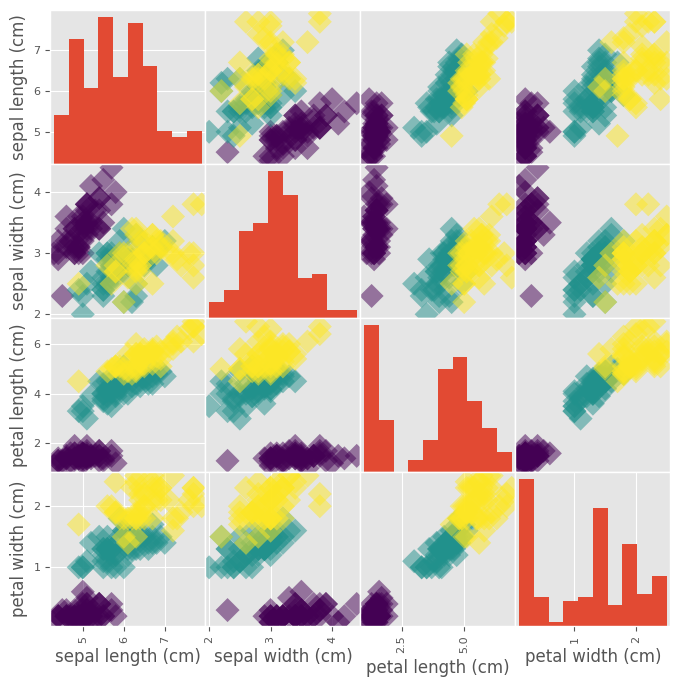

In [ ]:
#visual EDA
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8],
                               s=150, marker="D")

#you see with EDA we can see the correlation of each metrics. for example the petal length and width is higly correlated

## **The classification challenge**

**k-nearest neighbors (KNN)**
the basic idea of K-nearest neighbors is to predict the label of any data point by looking at the K (for example k=3, look at the 3 closest label data point and getting them to vote on what label the unlabeles point should have (majority votes))


In [ ]:
#fit a classifier with scikit-learn
from sklearn.neighbors import KNeighborsClassifier

#instantioate the classifier
knn = KNeighborsClassifier(n_neighbors=6)

#fit the classifier to training data set
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [ ]:
#Predicting unlabeled data
#we have the model now lets feed it some new data
X_new = np.array([[5.6,2.8,3.9,1.1],
                  [5.7,2.6,3.8,1.3],
                  [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)
print('Predition: {}'.format(prediction))

# it predicted 1 -> versicolor
# 0 -> setosa

Predition: [1 1 0]


## Measuring model performance
the most common metrics is accuracy, bassically the fractions of accurately predicted data

we need to separate the data:
1. train data
2. test data

In [ ]:
#lets split our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)
#what is stratify?
# it a best practice to perform your split data so that the split reflects
# the labels on your data or in other words you want the labels to be distributed
#in the train and test sets as they are in the original dataset

In [ ]:
#instantied the classifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set predictions: {}".format(y_pred))

Test set predictions: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [ ]:
#now to checkt the accuracy of our model, we use the score method
knn.score(X_test, y_test)

0.9555555555555556

Now lets talk about how we chose the numeber of neighbor.


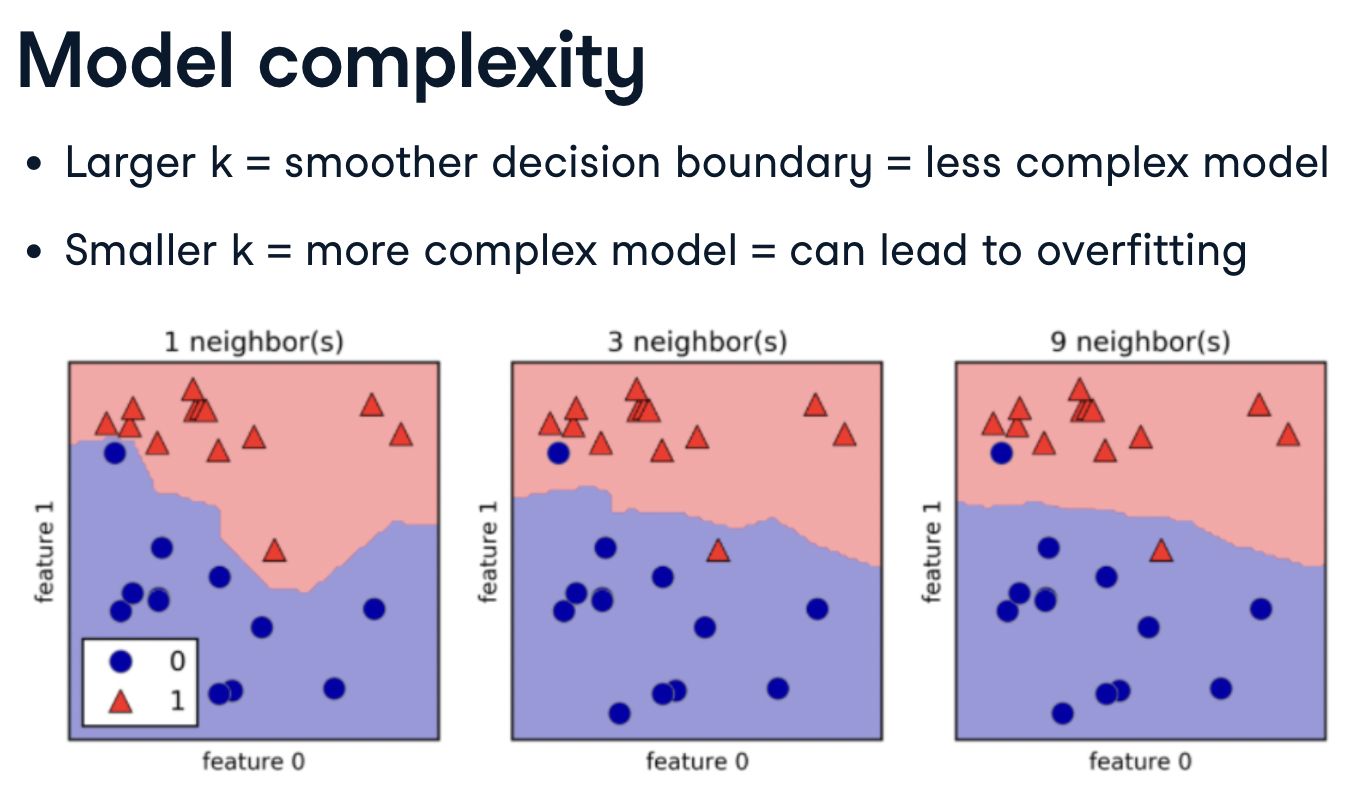

(Picture Source datacampe Scikit learn)

As we can see in the picture (source: Datacamp) ,
1. as K increase the decision boundary gets smoother and less curvy -> les complex model
2. as K decrease -> more complex model but prone to overfitting


What we want is the middle spot where is not overfit or underfit. see picture below

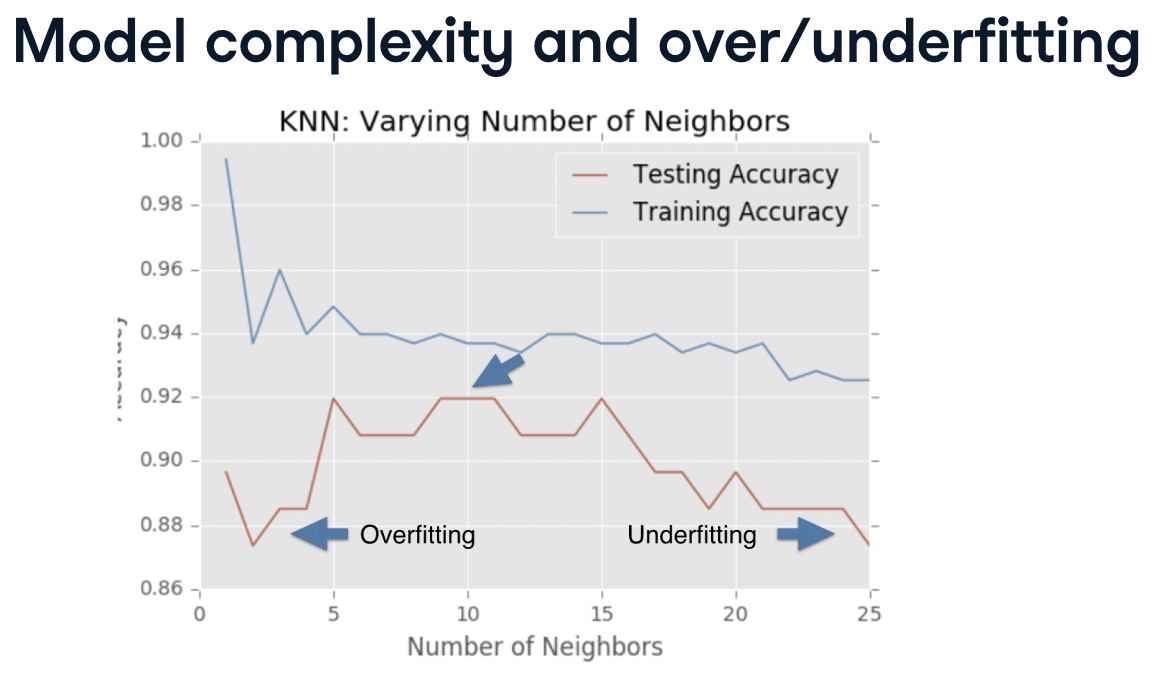

(Picture Source datacampe Scikit learn)

# **Regression**

Now lets move on to regression,


In [ ]:
#we have some dataset
boston = pd.read_csv("/content/boston_ex - Sheet1.csv")

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,538.0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,469.0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,469.0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,458.0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,458.0,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**some explanation in the data**

1. CRIM is per capita crime rate
2. NX is nitric oxides concentration
3. RM is avg number of rooms per dwelling

the target variable MEDV, is the median value of owner occupied homes in thousands of dollar

In [ ]:
#we need to create the dataframe
X = boston.drop('MEDV', axis=1).values #drop the target variable
y = boston['MEDV'].values

In [ ]:
# now for starter lets try to predict the price based on a single feature
X_rooms = X[:,5]

type(X_rooms), type(y)


(numpy.ndarray, numpy.ndarray)

In [ ]:
X_rooms.shape

(506,)

In [ ]:
#reshape the data
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

In [ ]:
X_rooms.shape

(506, 1)

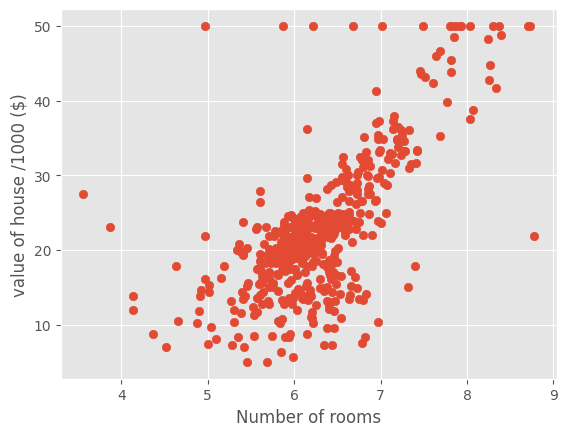

In [ ]:
#Plotting house value vs number of rooms
plt.scatter(X_rooms, y)
plt.ylabel("value of house /1000 ($)")
plt.xlabel('Number of rooms')
plt.show();
# as we can see more rooms mea higher prices

In [ ]:
#fitting a regression model
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

#create a data to test the model
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1,1)


In [ ]:
prediction_space

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184],
       [4.62610204],
       [4.73261224],
       [4.83912245],
       [4.94563265],
       [5.05214286],
       [5.15865306],
       [5.26516327],
       [5.37167347],
       [5.47818367],
       [5.58469388],
       [5.69120408],
       [5.79771429],
       [5.90422449],
       [6.01073469],
       [6.1172449 ],
       [6.2237551 ],
       [6.33026531],
       [6.43677551],
       [6.54328571],
       [6.64979592],
       [6.75630612],
       [6.86281633],
       [6.96932653],
       [7.07583673],
       [7.18234694],
       [7.28885714],
       [7.39536735],
       [7.50187755],
       [7.60838776],
       [7.71489796],
       [7.82140816],
       [7.92791837],
       [8.03442857],
       [8.14093878],
       [8.24744898],
       [8.35395918],
       [8.46046939],
       [8.566

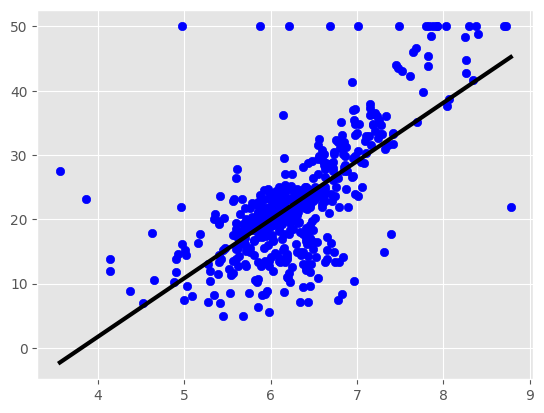

In [ ]:
plt.scatter(X_rooms, y, color="blue")
plt.plot(prediction_space, reg.predict(prediction_space),
         color="black", linewidth=3)

plt.show()